In [ ]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [ ]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
from matplotlib import pyplot as plt

import requests
matplotlib.rcParams["font.size"] = 12

### IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris
- This set of data is used in beginning Machine Learning Courses
- You can train a ML algorithm to use the values to predict the class of iris
- Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [ ]:
# Warmup 1:  Requests and file writing

# use requests to get this file  "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

# check that the request was successful


# open a file called "iris.csv" for writing the data locally to avoid spamming their server

# write the text of response to the file object

# close the file object

# Look at the file you downloaded. What's wrong with it?

In [ ]:
# Warmup 2:  Making a DataFrame

# read the "iris.csv" file into a Pandas dataframe

# display the head of the data frame


In [ ]:
# Warmup 3: Our CSV file has no header....let's add column names.
#           Refer to the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# Attribute Information:
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class: Iris Setosa, Iris Versicolour, Iris Virginica

# These should be our headers ["sep-length", "sep-width", "pet-length", "pet-width", "class"]


In [ ]:
# Warmup 4: Connect to our database version of this data!
iris_conn = sqlite3.connect("iris-flowers.db")
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", iris_conn)

In [ ]:
# Warmup 5: Using SQL, get the 10 'Iris-setosa' flowers with the longest sepal length.
#           Break any ties by ordering by the shortest sepal width.

pd.read_sql("""

""", iris_conn)

# Lecture 36:  Scatter Plots
**Learning Objectives**
- Set the marker, color, and size of scatter plot data
- Calculate correlation between DataFrame columns
- Use subplots to group scatterplot data

## Set the marker, color, and size of scatter plot data

To start, let's look at some made-up data about Trees.
The city of Madison maintains a database of all the trees they care for.

In [ ]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
trees_df = DataFrame(trees)
trees_df.head()

### Scatter Plots
We can make a scatter plot of a DataFrame using the following function...

`df_name.plot.scatter(x="x_col_name", y="y_col_name", color="peachpuff")`

Plot the trees data comparing a tree's age to its height...
 - What is `df_name`?
 - What is `x_col_name`?
 - What is `y_col_name`?

Now plot with a little more beautification...
 - Use a new [color](https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png)
 - Use a type of [marker](https://matplotlib.org/stable/api/markers_api.html)
 - Change the size (any int)

In [ ]:
# Plot with some more beautification options.


In [ ]:
# Add a title to your plot.


#### Correlation

In [ ]:
# What is the correlation between our DataFrame columns?


In [ ]:
# What is the correlation between age and height (don't use .iloc)


### Variating Stylistic Parameters

In [ ]:
# Option 1:
trees_df.plot.scatter(x="age", y="height",  marker="H", s="diameter")

In [ ]:
# Option 2:
trees_df.plot.scatter(x="age", y="height", marker = "H", s=trees_df["diameter"] * 50) # this way allows you to make it bigger

## Use subplots to group scatterplot data

### Re-visit the Iris Data


In [ ]:
iris_df

### How do we create a *scatter plot* for various *class types*?
First, gather all the class types.

In [ ]:
# In Pandas
varietes = ???
varietes

In [ ]:
# In SQL
varietes = pd.read_sql("""

""", iris_conn)
varietes

In reality, you can choose to write Pandas or SQL queries (or a mix of both!). For the rest of this lecture, we'll use Pandas.

In [ ]:
# If you want to continue using SQL instead, don't close the connection!
iris_conn.close()

In [ ]:
# Change this scatter plot so that the data is only for class ='Iris-setosa'
iris_df.plot.scatter(x = "pet-width", y = "pet-length")

In [ ]:
# Write a for loop that iterates through each variety in classes
# and makes a plot for only that class

for i in range(len(varietes)):
    variety = varietes[i]
    pass

In [ ]:
# copy/paste the code above, but this time make each plot a different color
colors = ["blue", "green", "red"]


In [ ]:
# copy/paste the code above, but this time make each plot a different color AND marker
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]


In [ ]:
# Did you notice that it made 3 plots?!?! What's decieving about this?

In [ ]:
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]


In [ ]:
# Have to be VERY careful to not crop out data.
# We'll talk about this next lecture.

In [ ]:
# Better yet, we could combine these.

### We can make Subplots in plots, called an AxesSubplot, keyword ax
1. if AxesSuplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used

In [ ]:
# complete this code to make 3 plots in one

plot_area = None   # don't change this...look at this variable in line 12
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]


### Time-Permitting
Plot this data in an interesting/meaningful way & identify any correlations.

In [ ]:
students = pd.DataFrame({
    "name": [
        "Cole",
        "Cynthia",
        "Alice",
        "Seth"
    ],
    "grade": [
        "C",
        "AB",
        "B",
        "BC"
    ],
    "gpa": [
        2.0,
        3.5,
        3.0,
        2.5
    ],
    "attendance": [
        4,
        11,
        10,
        6
    ],
    "height": [
        68,
        66,
        60,
        72
    ]
})
students

In [ ]:
# Min, Max, and Overall Difference in Student Height
min_height = students["height"].min()
max_height = students["height"].max()
diff_height = max_height - min_height

# Normalize students heights on a scale of [0, 1] (black to white)
height_colors = (students["height"] - min_height) / diff_height

# Normalize students heights on a scale of [0, 0.5] (black to gray)
height_colors = height_colors / 2 

# Color must be a string (e.g. c='0.34')
height_colors = height_colors.astype("string")

height_colors

In [ ]:
# Plot!


In [ ]:
# What are the correlations?


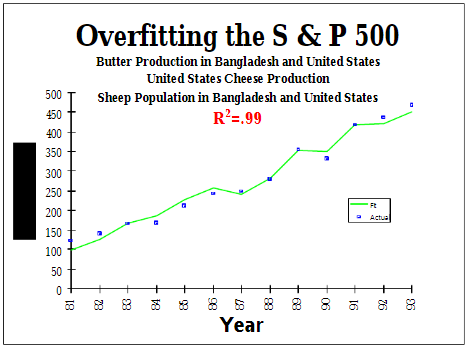

https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500